<h1>Using NLP techniques to Summarize text from website</h1><br><br>
For this project I will attempt to retrieve text from a wikipedia entry, before utilizing NLP techniques to clean and summarize the text.

First, we will import all our libraries.

In [5]:
# processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import requests # for getting HTML code
from bs4 import BeautifulSoup # for parsing the HTML code

# visualization libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy import displacy

In [6]:
url = "https://en.wikipedia.org/wiki/Salesforce" # input url
response = requests.get(url) # retrieve url response
html_content = response.content # retrieve content from response
soup = BeautifulSoup(html_content, 'html.parser') # create a beautiful soup object with the content

In [9]:
paragraphs = soup.find_all('p') # find all paragraphs in content
paragraph_text = [paragraph.get_text() for paragraph in paragraphs] # get text for each paragraph


We will now apply data preprocessing for cleaner data then remove stopwords

In [15]:
lowercase_text = [text.lower() for text in paragraph_text]
cleaned_text = [re.sub(r'[^a-zA-Z0-9\s]', '', text) for text in lowercase_text]
tokenized_text = [word_tokenize(text) for text in cleaned_text]

In [16]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\etran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
filtered_text = [[word for word in tokens if word not in stop_words] for tokens in tokenized_text]

In [18]:
final_text = [[word for word in tokens if word.strip()] for tokens in filtered_text]

In [21]:
sentences = [' '.join(tokens) for tokens in final_text]

In [54]:
# tokenize using strip() and split()
sentences = sentences.strip().split('.')
print(sentences)

AttributeError: 'list' object has no attribute 'strip'

It seems I have a list where the words should have been joined into a single string. I am out of time to find where my logic error is, so I will pivot and copy the text from the website manually.

In [24]:
text = """Salesforce, Inc. is an American cloud-based software company headquartered in San Francisco, California. It provides customer relationship management (CRM) software and applications focused on sales, customer service, marketing automation, e-commerce, analytics, and application development.

Founded by former Oracle executive Marc Benioff in February 1999, Salesforce grew quickly, making its IPO in 2004. As of September 2022, Salesforce is the 61st largest company in the world by market cap with a value of nearly US$153 billion.[2] Salesforce's rapid growth made it the first cloud computing company to reach US$1 billion in annual revenue, which it achieved in fiscal year 2009.[3] It became the world's largest enterprise software firm in 2022.[4] Salesforce ranked 136th on the most recent edition of the Fortune 500, making[clarification needed] US$26.5 billion in 2022.[5] Since 2020, Salesforce has also been a component of the Dow Jones Industrial Average.[6]

History

Salesforce's annual Dreamforce convention in 2022
Salesforce was founded in 1999 by former Oracle executive Marc Benioff, together with Parker Harris, Dave Moellenhoff, and Frank Dominguez as a software as a service (SaaS) company.[7][8] Two of Salesforce's earliest investors were Larry Ellison, the co-founder and first CEO of Oracle, and Halsey Minor, the founder of CNET.[8]

Salesforce was severely affected by the dot-com bubble bursting at the beginning of the new millennium, with the company laying off 20% of its workforce. Despite its losses, Salesforce continued strong during the early 2000s. Salesforce also gained notability during this period for its "the end of software" tagline and marketing campaign, in which it also hired actors to hold up signs with its slogan outside a Siebel Systems conference.[9] Salesforce's revenue continued to increase from 2000 to 2003, with 2003's revenue skyrocketing from $5.4 million in the fiscal year 2001 to over $100 million by December 2003.[3]

Also in 2003, Salesforce held its first annual Dreamforce conference in San Francisco.[10] In June 2004, the company had its initial public offering on the New York Stock Exchange under the stock symbol CRM and raised US$110 million.[11][12] In 2006, Salesforce launched IdeaExchange, a platform that allows customers to connect with company product managers.[13]

In 2009, Salesforce passed $1 billion in annual revenue.[8] Also, in 2009, the company launched Service Cloud, an application that helps companies manage service conversations about their products and services.[14]

In 2014, the company released Trailhead, a free online learning platform.[15] In October 2014, Salesforce announced the development of its Customer Success Platform.[16] In September 2016, Salesforce announced the launch of Einstein, an artificial intelligence platform that supports several of Salesforce's cloud services.[17][18]

In 2020, Salesforce joined the Dow Jones Industrial Average, replacing energy giant and Standard Oil-descendant ExxonMobil.[19] Salesforce's ascension to the Dow Jones was concurrent with that of Amgen and Honeywell.[6] Because the Dow Jones factors its components by market price, Salesforce was the largest technology component of the index at its accession.[20]

Across 2020 and 2021, Salesforce saw some notable leadership changes; in February 2020, co-chief executive officer Keith Block stepped down from his position in the company.[21] Marc Benioff remained as chairman and chief executive officer.[22] In February 2021, Amy Weaver, previously the chief legal officer, became CFO. Former CFO Mark Hawkins announced that he would be retiring in October.[23][24] In November 2021, Bret Taylor was named vice chair and co-CEO of the company.[25]

In December 2020, it was announced that Salesforce would acquire Slack for $27.7 billion, its largest acquisition to date.[26] The acquisition closed in July 2021.[27] Journalists covering the acquisition emphasized the price Salesforce paid for Slack, which was a 54% premium compared to Slack's market value, as too high of a premium for the company, with views varying from the premium being too concerning for investors to Salesforce playing the long game.[28][29]

In August 2022, Salesforce reported second-quarter earnings of $7.72 billion. Upon the German software firm SAP reporting its earnings for the same quarter totaling €7.52 Billion,[a] Acceleration Economy reported that Salesforce had surpassed SAP to become the world's largest enterprise software vendor. This mirrored Benioff's remarks in Salesforce's earnings call, where he stated he looked at "this quarter very much as kind of a milestone".[4]

Salesforce announced a partnership with Meta Platforms in September 2022. The deal called for Meta's consumer application WhatsApp to integrate Salesforce's Customer 360 platform to allow consumers to communicate with companies directly.[30]

In November 2022, Salesforce announced it would terminate employees in its sales organization.[31] Protocol reported that the company would likely eliminate some 2500 jobs.[32]

In November 2022, Salesforce announced its co-CEO and vice chair, Bret Taylor, would be stepping down from his roles at the end of January 2023, with Benioff continuing to run the company and serve as board chair. Within the week, former Tableau CEO Mark Nelson and former Slack CEO Stewart Butterfield also announced their departures. When asked about the departures, Benioff stated, "people come and people go"; Salesforce's stock dropped to a 52-week low after Nelson's resignation.[33][34][35][36]

In January 2023, the company announced a layoff of about 10% or approximately 8,000 positions. According to Benioff, the company hired too aggressively during the COVID-19 pandemic and the increase in working from home led to the layoff. The company will also reduce office space as part of the restructuring plan.[37] The same month brought an announcement from activist investor Elliott Management that it would acquire a "big stake" in the company.[38]

Services
Salesforce offers several customer relationship management (CRM) services, including: Sales Cloud,[39] Service Cloud,[40] Marketing Cloud,[41] and Commerce Cloud and Platform.[41] Additional technologies include Slack.

Main services
Salesforce's main services are for customer management. Other services include app creation, data integration and visualization, and training.[42]

Salesforce Platform
Salesforce Platform (formerly known as Force.com) is a platform as a service (PaaS) that allows developers to add applications to the main Salesforce.com application.[43][failed verification] These applications are hosted on Salesforce.com's infrastructure.[44]

Force.com applications are built using Apex, a proprietary Java-like programming language[45] to generate HTML originally via the "Visualforce" framework. Beginning in 2015[46] the "Lightning Components" framework has been supported. The Apex Compiler was designed by James Spagnola.[47]

As of 2014, the Force.com platform had 1.5 million registered developers according to SalesForce.[48]

AppExchange
Launched in 2005, the Salesforce AppExchange is an online app store that allows users to sell third-party applications and consulting services.[49][50]

As of 2021, the exchange has over 5,000 apps listed.[51][52]

Trailhead
Launched in 2014, Trailhead is a free online learning platform with courses focused on Salesforce technologies.[53][54][15]

Discontinued
Desk.com logo
Desk.com logo
Desk.com was a SaaS help desk and customer support product that was acquired by Salesforce for $50 million in 2011.[55][56] In March 2018, Salesforce announced that Desk.com would be consolidated with other services into Service Cloud Essentials.[57]

Do.com was a cloud-based task management system for small groups and businesses, introduced in 2011, and discontinued in 2014.[58][59][60]

Operations

A discussion panel at Salesforce's Customer Company Tour event that focused on customer relationship management
Salesforce is headquartered in San Francisco in the Salesforce Tower.[61] Salesforce has 110 offices, including ones in Hong Kong, Israel, London, Paris, Sydney and Tokyo.[62][63]


Salesforce Tower in New York City
Standard & Poor's added Salesforce to the S&P 500 Index in September 2008.[64] In August 2020, S&P Dow Jones Indices announced that Salesforce would replace ExxonMobil in the Dow Jones Industrial Average.[19]

Culture
According to Marc Benioff, Salesforce corporate culture is based on the concept of Ohana.[65]

In 2021, Cynthia Perry, a design research senior manager, resigned, alleging discrimination in the workplace and posting her resignation letter on LinkedIn.[66][67]

On September 10, 2021, Benioff tweeted that the company is prepared to help any employee who wishes to move out of the state of Texas, following the abortion in Texas legislation announced on September 1, 2021.[68]

Finances
For the fiscal year 2022, Salesforce reported revenue of US$26.49 billion, an increase of 25% year-over-year and 24% in constant currency.[69] Salesforce ranked 126 on the 2022 Fortune 500 list of the largest United States companies by revenue.[70]

Year[71]	Revenue
US$
millions	Net income
US$
millions	Total Assets
US$
millions	Price per Share
US$	Employees
2005	176	7	280	5.19	767
2006	310	28	435	8.62	1,304
2007	497	0	665	11.69	2,070
2008	749	18	1,090	13.43	2,606
2009	1,077	43	1,480	11.37	3,566
2010	1,306	81	2,460	24.21	3,969
2011	1,657	64	3,091	32.93	5,306
2012	2,267	−12	4,164	35.73	7,785
2013	3,050	−270	5,529	45.94	9,800
2014	4,071	−232	9,153	57.26	13,300
2015	5,374	−263	10,665	70.66	16,000
2016	6,667	−47	12,763	74.55	19,000
2017	8,392	180	17,585	90.26	25,000
2018	10,480	127	21,010	132.21	29,000
2019	13,282	1,110	30,737	155.10	35,000
2020	17,098	126	55,126	222.40	49,000
2021	21,252	4,072	66,301	255.33	56,606
2022	26,492	1,444	95,209	132.59	73,541
2023	31,352	208	98,849		79,390
IT infrastructure
In 2008, Salesforce migrated from Sun Fire E25K servers with SPARC processors running Solaris, to Dell servers with Advanced Micro Devices processors, running Linux.[72]

In 2012, Salesforce announced plans to build a data center in the UK to handle European citizens' personal data.[73] The center opened in 2014.[74]

In 2013, Salesforce and Oracle announced a nine-year partnership focusing on applications, platforms, and infrastructure.[75]

In 2016, Salesforce announced that it will use Amazon Web Services hosting for countries with restrictive data residency requirements and where no Salesforce data centers are operating.[76]

Acquisitions
Salesforce has acquired many companies throughout its history.

2006–2015
In 2006, Salesforce acquired Sendia, a mobile web service firm, for $15 million[77] and Kieden, an online advertising company.[78] In 2007, Koral, a content management service, was acquired.[79] In 2008, Salesforce acquired Instranet for $31.5 million.[80] In 2010, Salesforce acquired multiple companies, including Jigsaw, a cloud-based data service provider, for $142 million,[81] Heroku, a Ruby application platform-as-a-service, for $212 million,[82] and Activa Live Chat, a live chat software provider.[83] In 2011, Salesforce acquired Dimdim, a web conferencing platform, for $31 million,[84] Radian6, a social media tracking company, for $340 million,[85] and Rypple, a performance management software company.[86] Rypple became known as Work.com in 2012.[87] In 2012, Salesforce acquired Buddy Media, a social media marketer, for $689 million,[88] and GoInstant, a browser collaboration startup, for $70 million.[89]

In 2013, Salesforce acquired ExactTarget, an email marketer, for $2.5 billion.[90] In 2014, Salesforce acquired RelateIQ, a data company, for $390 million.[91] In 2015, Salesforce acquired multiple companies for undisclosed sums, including Toopher, a mobile authentication company,[92] Tempo, an AI calendar app,[93] and MinHash, an AI platform.[94] The company also acquired SteelBrick, a software company, for $360 million.[95]

2016–present
In 2016, Salesforce spent over $5 billion in acquisitions.[96] Companies acquired included Demandware, a cloud-based provider of e-commerce services, for $2.8 billion[97] and Quip, a word processing app, for $750 million.[98] In 2017, the company acquired Sequence, a user experience design agency, for an undisclosed amount.[99] In 2018, Salesforce acquired several companies, including MuleSoft, a cloud service company, for $6.5 billion,[100][101] as well as Rebel, an email services provider,[102] and Datorama, an AI marketing platform, for undisclosed amounts.[103]

Between 2019 and 2021, Salesforce made two of its largest acquisitions, with Salesforce completing its acquisition Tableau, a data visualization and analytics software company, for $15.7 billion[104] in 2019, and Slack Technologies, the developers of its namesake office messaging platform, for $27.7 billion in 2021.[105] Salesforce also made smaller acquisitions throughout 2019, 2020, and 2021, which included ClickSoftware for $1.35 billion,[106] consulting firm Acumen Solutions for $570 million,[107] CRM firm Vlocity for $1.33 billion,[21] privacy compliance startup Phennecs for $16.5 million,[108] and robotic process automation firm Servicetrace for an undisclosed amount.[109]

Salesforce's most recent acquisition was Slack-bot maker Troops.ai, announced in May 2022, and expected to close in 2023.[110]

In September 2023, Salesforce acquired Airkit.ai, a creator of AI-powered customer service applications and experiences.[111]


Simplified timeline of Salesforce's biggest acquisitions ($750M or greater).
Controversies
Subject to a phishing attack
In November 2007, a phishing attack compromised contact information on a number of Salesforce customers. Some customers then received phishing emails that appeared to be invoices from Salesforce.[112][113] Salesforce stated that "a phisher tricked someone into disclosing a password, but this intrusion did not stem from a security flaw in [the salesforce.com] application or database."[112]

‘Meatpistol’ presenters let go at Def Con
In 2017, at DEF CON, two security engineers were let go after giving a presentation on an internal project called MEATPISTOL.[114] The presenters were sent a message 30 minutes prior to the presentation telling them not to go on stage, but the message wasn't seen until after they finished.[114][115] The MEATPISTOL tool was anticipated to be released as open-source at the time of the presentation, but Salesforce didn't release the code to developers or the public during the conference.[114] The terminated employees called on the company to open-source the software after being let go.[116]

RAICES donation refusal
The not-for-profit organization Refugee and Immigrant Center for Education and Legal Services (RAICES) rejected a US$250,000 donation from Salesforce because the company has contracts with U.S. Customs and Border Protection.[117]

2018 taxes
In December 2019, the Institute on Taxation and Economic Policy found that Salesforce was one of 91 companies who "paid an effective federal tax rate of 0% or less" in 2018, as a result of the Tax Cuts and Jobs Act of 2017. Their findings were published in a report based on the 379 Fortune 500 companies that declared a profit in 2018.[118]

Sex trafficking lawsuit
In March 2019, Salesforce faced a lawsuit by 50 anonymous women claiming to be victims and survivors of sex trafficking, abuse, and rape. The suit alleges that the company profited from and helped build technology that facilitated sex trafficking on Backpage.com, a now defunct website.[119] In March 2021, a judge granted partial dismissal of the case, dismissing charges of negligence and conspiracy, but allowed the case to proceed regarding charges of sex trafficking.[120]

Disability discrimination lawsuit in Japan

This section needs to be updated. Please help update this article to reflect recent events or newly available information. (March 2023)
In July 2021, Salesforce Japan faced a discrimination lawsuit from a former employee, according to Japanese legal media.[121] The firm declined to comment on the suit to the media. The ex-employee, who has Autism Spectrum Disorder and ADHD, claimed she was discriminated against because of her disability and terminated in the firm’s Japan web marketing team. The suit alleged that the anonymous woman, as an employee at Salesforce Japan from 2018 to 2020, faced hate speech, microaggressions and rejection of reasonable accommodation from the manager. She alleged that her attempts to resolve the problem were met with pressure from HR and job coach. The lawsuit is still continuing in Tokyo district court.[122][123]

In Japan, the legal disability quota for private companies is 2.3%. But Salesforce Japan has not met the quota and pay levy from 2009-2021 except 2017. In 2020 the firm did not report the number of disabled employees to Japanese labor official. Depending on the result of lawsuit, it is undeniable that the firm may face a risk of negative impact to disability hiring such as performance improvement plan on the disability employment act or disclosure as social punishment from the labor official.[124]

Employee layoffs/Matthew McConaughey’s salary
In January 2023, Salesforce reported that 8,000 employees had been laid off as a result of over-hiring during the Covid lockdown and a global economic downturn. In March 2023, the Wall Street Journal reported that actor Matthew McConaughey was paid 10 million dollars yearly for his role as a “creative advisor and TV pitchman”. American musician will.i.am was also cited to be on the company’s payroll due to his “strong understanding of technology”.[125][126]

Salesforce Ventures
In 2009, Salesforce began investing in startups.[127] These investments became Salesforce Ventures, headed by John Somorjai[127][128] In September 2014, SFV set up Salesforce1 Fund, aimed at start-ups creating applications primarily for mobile phones.[129] In December 2018, Salesforce Ventures announced the launch of the Japan Trailblazer Fund, focused on Japanese startups.[130]

In August 2018, Salesforce Ventures reported investments totaling over $1 billion in 275 companies, including CloudCraze (e-commerce),[131] Figure Eight (artificial intelligence),[132] Forter (online fraud prevention),[133] and FinancialForce (automation software).[134] In 2019, SFV's five largest investments—Domo (data-visualization software), SurveyMonkey (online survey software), Twilio (cloud-communication), Dropbox (cloud storage), and DocuSign (secure e-signature company)—accounted for nearly half of its portfolio.[135] In 2021, Salesforce announced that its investments had resulted in $2.17 Billion annual gain.[136] In June 2023 Salesforce increased the size of its Generative AI Fund for startups from $250 million to $500 million.[137]"""

In [26]:
# tokenize using strip() and split()
sentences = text.strip().split('.')
print(sentences)

['Salesforce, Inc', ' is an American cloud-based software company headquartered in San Francisco, California', ' It provides customer relationship management (CRM) software and applications focused on sales, customer service, marketing automation, e-commerce, analytics, and application development', '\n\nFounded by former Oracle executive Marc Benioff in February 1999, Salesforce grew quickly, making its IPO in 2004', ' As of September 2022, Salesforce is the 61st largest company in the world by market cap with a value of nearly US$153 billion', "[2] Salesforce's rapid growth made it the first cloud computing company to reach US$1 billion in annual revenue, which it achieved in fiscal year 2009", "[3] It became the world's largest enterprise software firm in 2022", '[4] Salesforce ranked 136th on the most recent edition of the Fortune 500, making[clarification needed] US$26', '5 billion in 2022', '[5] Since 2020, Salesforce has also been a component of the Dow Jones Industrial Average'

In [27]:
sentences[2]

' It provides customer relationship management (CRM) software and applications focused on sales, customer service, marketing automation, e-commerce, analytics, and application development'

In [28]:
# tokenize into sentences using sent_tokenize
sent_tokenized = sent_tokenize(text)

In [29]:
len(sent_tokenized)

134

In [30]:
print(sent_tokenized)

['Salesforce, Inc. is an American cloud-based software company headquartered in San Francisco, California.', 'It provides customer relationship management (CRM) software and applications focused on sales, customer service, marketing automation, e-commerce, analytics, and application development.', 'Founded by former Oracle executive Marc Benioff in February 1999, Salesforce grew quickly, making its IPO in 2004.', 'As of September 2022, Salesforce is the 61st largest company in the world by market cap with a value of nearly US$153 billion.', "[2] Salesforce's rapid growth made it the first cloud computing company to reach US$1 billion in annual revenue, which it achieved in fiscal year 2009.", "[3] It became the world's largest enterprise software firm in 2022.", '[4] Salesforce ranked 136th on the most recent edition of the Fortune 500, making[clarification needed] US$26.5 billion in 2022.', '[5] Since 2020, Salesforce has also been a component of the Dow Jones Industrial Average.', "[

In [31]:
sent_tokenized[2]

'Founded by former Oracle executive Marc Benioff in February 1999, Salesforce grew quickly, making its IPO in 2004.'

We will preprocess the text again using functions.

In [32]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def preprocess_text_re(text):
    words = word_tokenize(text)
    cleaned_sentences = re.sub(r'[^a-zA-Z]', ' ', text)
    cleaned_words = word_tokenize(cleaned_sentences)
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum and word not in stop_words]
    return ' '.join(cleaned_words)

In [33]:
preprocessed_sentences = []
for sentence in sent_tokenized:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [34]:
print(preprocessed_sentences)

['salesforce american software company headquartered san francisco california', 'provides customer relationship management crm software applications focused sales customer service marketing automation analytics application development', 'founded former oracle executive marc benioff february 1999 salesforce grew quickly making ipo 2004', 'september 2022 salesforce 61st largest company world market cap value nearly us 153 billion', '2 salesforce rapid growth made first cloud computing company reach us 1 billion annual revenue achieved fiscal year 2009', '3 became world largest enterprise software firm 2022', '4 salesforce ranked 136th recent edition fortune 500 making clarification needed us billion 2022', '5 since 2020 salesforce also component dow jones industrial average', '6 history salesforce annual dreamforce convention 2022 salesforce founded 1999 former oracle executive marc benioff together parker harris dave moellenhoff frank dominguez software service saas company', '7 8 two s

Now we will fit transform the preprocessed sentences using tfidf to make a matrix, and sum the scores of each sentences horizontally.

In [35]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(preprocessed_sentences)
tfidf_scores = tfidf_matrix.sum(axis=1) # axis = 1 means horizontal

In [36]:
top_sentences_indices = np.argsort(tfidf_scores, axis=0)[-5:] # axis = 0 means sort vertically, and get the top 5

Now we have the indices for the top 5 matches we just sorted.

In [37]:
top_sentences_indices

matrix([[ 93],
        [ 92],
        [129],
        [ 94],
        [ 72]], dtype=int64)

Now we can easily create a summary using those 5 top sentences.

In [38]:
top_sentences = []
for index in range(len(top_sentences_indices)):
    val = sent_tokenized[index]
    summary = ''.join(val) + '.'
    print(summary)

Salesforce, Inc. is an American cloud-based software company headquartered in San Francisco, California..
It provides customer relationship management (CRM) software and applications focused on sales, customer service, marketing automation, e-commerce, analytics, and application development..
Founded by former Oracle executive Marc Benioff in February 1999, Salesforce grew quickly, making its IPO in 2004..
As of September 2022, Salesforce is the 61st largest company in the world by market cap with a value of nearly US$153 billion..
[2] Salesforce's rapid growth made it the first cloud computing company to reach US$1 billion in annual revenue, which it achieved in fiscal year 2009..


Reading the summary, it seems like an efficient way to summarize the content as these sentences seem very relevant and informative.
<br><br>
Next, let's do some visualization. Here is a basic wordcloud using the original text.

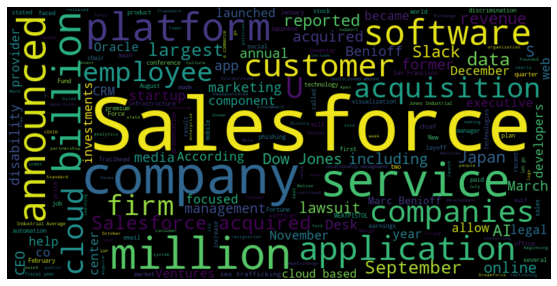

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can also translate using textblob. Here I will translate the summary from english to japanese.

In [40]:
blob = TextBlob(summary)
japanese_summary = blob.translate('en', 'ja')
print(japanese_summary)

[2] Salesforceの急速な成長により、2009年度に達成された年間収益が10億米ドルに達した最初のクラウドコンピューティング会社になりました。


In [ ]:
# !pip install -U spacy

In [ ]:
# !python -m spacy download en

<h2>NER</h2>
Named entity recognition is easy due to spacy and the en_core_web_sm pretrained model. It displays the entities each in their own colors, and the colors and even which entities to color is all customizable.

In [43]:
nlp = spacy.load('en_core_web_sm')

In [44]:
doc = nlp(text)

In [45]:
displacy.render(doc, style='ent', jupyter=True)

<h2>POS</h2>
Parts of speech is also made easy with nltk's pos_tag function. First, we will tokenize each word in the text before passing it through that function.

In [55]:
words = word_tokenize(text)

In [56]:
print(len(words))

3694


In [48]:
nltk.pos_tag(words)

[('Salesforce', 'NNP'),
 (',', ','),
 ('Inc.', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('cloud-based', 'JJ'),
 ('software', 'NN'),
 ('company', 'NN'),
 ('headquartered', 'VBD'),
 ('in', 'IN'),
 ('San', 'NNP'),
 ('Francisco', 'NNP'),
 (',', ','),
 ('California', 'NNP'),
 ('.', '.'),
 ('It', 'PRP'),
 ('provides', 'VBZ'),
 ('customer', 'NN'),
 ('relationship', 'NN'),
 ('management', 'NN'),
 ('(', '('),
 ('CRM', 'NNP'),
 (')', ')'),
 ('software', 'NN'),
 ('and', 'CC'),
 ('applications', 'NNS'),
 ('focused', 'VBD'),
 ('on', 'IN'),
 ('sales', 'NNS'),
 (',', ','),
 ('customer', 'NN'),
 ('service', 'NN'),
 (',', ','),
 ('marketing', 'NN'),
 ('automation', 'NN'),
 (',', ','),
 ('e-commerce', 'NN'),
 (',', ','),
 ('analytics', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('application', 'NN'),
 ('development', 'NN'),
 ('.', '.'),
 ('Founded', 'VBN'),
 ('by', 'IN'),
 ('former', 'JJ'),
 ('Oracle', 'NNP'),
 ('executive', 'NN'),
 ('Marc', 'NNP'),
 ('Benioff', 'NNP'),
 ('in', 'IN'),
 ('

We can also use FreqDist to count how many times each word appears and plot the results.

In [49]:
fdist = FreqDist(words)

In [50]:
fdist.most_common(10)

[(',', 226),
 ('[', 153),
 (']', 153),
 ('.', 133),
 ('the', 108),
 ('Salesforce', 92),
 ('and', 64),
 ('a', 64),
 ('in', 58),
 ('of', 55)]

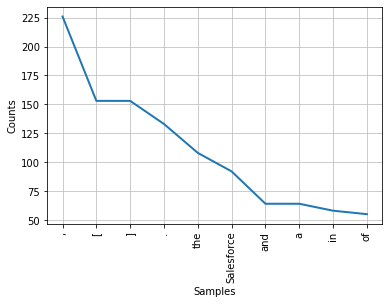

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
fdist.plot(10)

As you can see, this FreqDist does not have the stopwords and preprocessing done yet. I need to figure out how to join all the sentences in the list and extract it as a string to make this plot actually useful.

<h1>Conclusions</h1><br>
As we saw in this project, Python has a multitude of free libraries that makes it simple to grab text from a website, clean the text, tag parts of speech, and even find the most important sentences or plot the most frequently used words. However, it does still require a fundamental understanding of Python code and techniques in order to master it depending on the input. I had trouble mainly trying to turn the list into a single string, so I know where I need to focus on. All in all, I had a lot of fun doing this project.
<br>You can find this project on my github: 